<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PROBLEM 1

In [3]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))
cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [23]:
x = cancer.iloc[:,2:30].values  #Features
y = cancer.iloc[:,1].values  #Target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0) #80% - 20% split

In [28]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

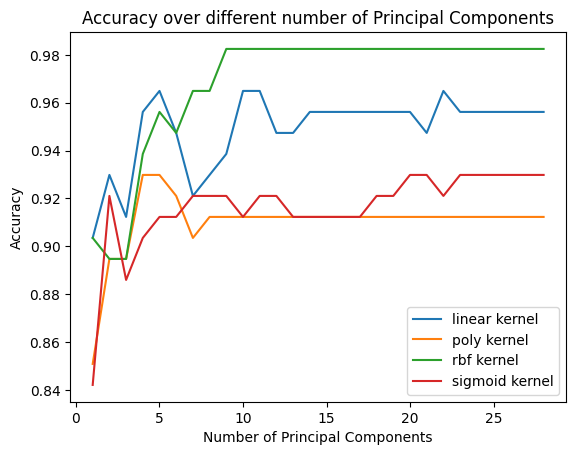

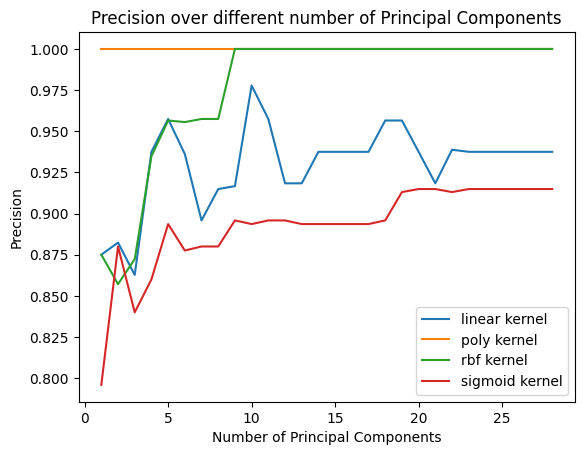

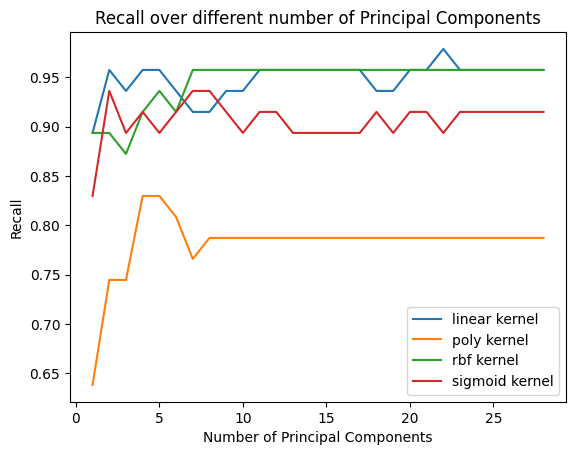

In [30]:
# Initialize variables for storing results
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    results[kernel] = {'accuracy': [], 'precision': [], 'recall': []}

# Perform PCA and SVM classification
for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_sc)
    X_test_pca = pca.transform(X_test_sc)

    for kernel in kernels:
        # Train SVM Classifier
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)

        # Make predictions
        y_pred = svm.predict(X_test_pca)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='M')
        recall = recall_score(y_test, y_pred, pos_label='M')


        # Store results
        results[kernel]['accuracy'].append(accuracy)
        results[kernel]['precision'].append(precision)
        results[kernel]['recall'].append(recall)


# Plotting the results
for metric in ['accuracy', 'precision', 'recall']:
    plt.figure()
    plt.title(f'{metric.capitalize()} over different number of Principal Components')
    for kernel in kernels:
        plt.plot(range(1, X_train.shape[1] + 1), results[kernel][metric], label=f'{kernel} kernel')
    plt.xlabel('Number of Principal Components')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

In [8]:
optimum_values = {
    'kernel': '',
    'n_components': 0,
    'accuracy': 0
}
if accuracy > optimum_values['accuracy']:
      optimum_values['accuracy'] = accuracy
      optimum_values['kernel'] = kernel
      optimum_values['n_components'] = n_components

# Print the optimum values
print(f"Optimum Kernel: {optimum_values['kernel']}")
print(f"Optimum Number of Principal Components: {optimum_values['n_components']}")
print(f"Highest Classification Accuracy: {optimum_values['accuracy']}")

Optimum Kernel: sigmoid
Optimum Number of Principal Components: 28
Highest Classification Accuracy: 0.8859649122807017


In [14]:
# "Linear Support vector classifier"
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, kernel='linear')

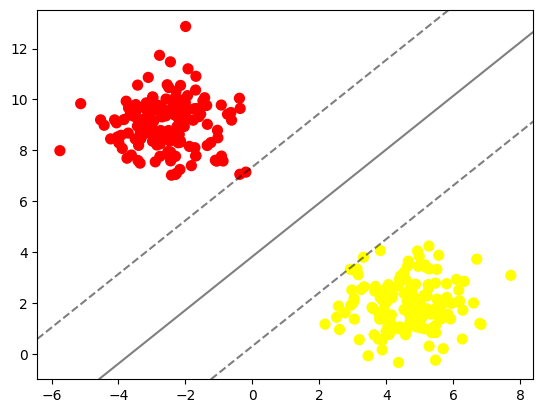

In [16]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# PROBLEM 2

In [ ]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

In [ ]:
print(housing.isnull().sum())

In [ ]:
# List of variables to map

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [ ]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# PCA and SVR regression
for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Linear Regression with Regularization
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf.fit(X_train_pca, y_train)
    svr_lin.fit(X_train_pca, y_train)
    svr_poly.fit(X_train_pca, y_train)

    y_rbf = svr_rbf.predict(X_test_pca)
    y_lin = svr_lin.predict(X_test_pca)
    y_poly = svr_poly.predict(X_test_pca)

lw = 0
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test_pca, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_test_pca, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_test_pca, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_results = {}
for kernel in kernels:
    # Initialize variables to store optimum values for each kernel
    optimum_K = 0
    lowest_mse = float('inf')

    # Loop over different numbers of principal components
    for K in range(1, X_train.shape[1] + 1):
        # Apply PCA
        pca = PCA(n_components=K)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVR model
        svr = SVR(kernel=kernel, C=1e3)
        if kernel == 'poly':
            svr.degree = 2
        svr.fit(X_train_pca, y_train)
        y_pred = svr.predict(X_test_pca)
        mse = mean_squared_error(y_test, y_pred)
        if mse < lowest_mse:
            lowest_mse = mse
            optimum_K = K

    # Store results
    mse_results[kernel] = {'Optimum_K': optimum_K, 'Lowest_MSE': lowest_mse}
    print(f"Kernel: {kernel}, Optimum K: {optimum_K}, Lowest MSE: {lowest_mse}")
    print(f"Optimum number of principal components (K): {optimum_values}, Lowest MSE: {lowest_mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(mse_results.keys(), [val['Lowest_MSE'] for val in mse_results.values()])
plt.xlabel('Kernel Type')
plt.ylabel('Lowest MSE')
plt.title('Comparison of Different Kernel Types')
plt.show()